# DANA 4830 team project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk

import os

In [2]:
# fig configurations
plt.rcParams["figure.figsize"] = [10,4]
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rcParams.update({'legend.fontsize': 11})
plt.rcParams.update({'axes.labelsize': 15})
plt.rcParams.update({'font.size': 15})

In [3]:
# path to save
path = os.path.join("..","summer21","DANA4830","Proj")

# savefig
def savePNG(f):
    fName = f+".png"
    fPath = os.path.join("figures",fName)
    plt.savefig(fPath, dpi=300)
    
# save df as csv
def saveCSV(f,fName):
    fName2 = fName+".csv"
    fPath = os.path.join("data",fName2)
    f.to_csv(fPath)

## load datasets

In [17]:
# datasets
d14Cat = pd.read_csv(os.path.join("data", "2014-aps-employee-census-5-point-dataset.csv"))
d14Cat.tail()

,AS,q1,q2@,q6@,q18a,q18b,q18c,q18d,q18e,q18f,...,q79d,q79e,q80,q81a.1,q81b.1,q81c.1,q81d.1,q81e.1,q81f.1,q81g.1
99387,"Medium (251 to 1,000 employees)",Female,40 to 54 years,Trainee/Graduate/APS,Agree,Agree,Agree,Agree,Agree,Agree,...,,,,,,,,,,
99388,"Medium (251 to 1,000 employees)",Male,55 years or older,Trainee/Graduate/APS,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Agree,...,,,,,,,,,,
99389,"Medium (251 to 1,000 employees)",Male,55 years or older,Trainee/Graduate/APS,Agree,Agree,Agree,Agree,Neither agree nor disagree,Disagree,...,,,,,,,,,,
99390,"Medium (251 to 1,000 employees)",Male,55 years or older,Trainee/Graduate/APS,Agree,Agree,Agree,Agree,Agree,Disagree,...,,,,,,,,,,
99391,"Medium (251 to 1,000 employees)",Female,55 years or older,Trainee/Graduate/APS,Agree,Strongly agree,Strongly agree,Strongly agree,Agree,Disagree,...,,,,,,,,,,


In [18]:
d14Cat.keys(), d14.shape

(Index(['AS', 'q1', 'q2@', 'q6@', 'q18a', 'q18b', 'q18c', 'q18d', 'q18e',
        'q18f',
        ...
        'q79d', 'q79e', 'q80', 'q81a.1', 'q81b.1', 'q81c.1', 'q81d.1', 'q81e.1',
        'q81f.1', 'q81g.1'],
       dtype='object', length=225),
 (99392, 225))

In [19]:
## compute empty cells cols
emp_aux = [sum(d14Cat[kk] == " ")/d14Cat.shape[0] for kk in d14Cat.keys()]
emp = pd.Series(emp_aux, index=d14Cat.keys())

## empty cells rows
emp_aux_row = [sum(d14Cat.loc[ix] == " ")/d14Cat.shape[1] for ix in d14Cat.index]
emp_row = pd.Series(emp_aux_row)

In [20]:
emp

AS        0.000000
q1        0.011279
q2@       0.046845
q6@       0.001137
q18a      0.009689
            ...   
q81c.1    0.993138
q81d.1    0.990301
q81e.1    0.998380
q81f.1    0.993893
q81g.1    0.997112
Length: 225, dtype: float64

In [21]:
list(emp.index)
tick = [d14Cat.keys()[0], d14Cat.keys()[1], d14Cat.keys()[2], d14Cat.keys()[3]]
tick_ix = [0, 1, 2, 3]

for j in range(4, d14Cat.shape[1]):
    if d14Cat.keys()[j-1][:3] != d14Cat.keys()[j][:3]:
        tick.append(d14Cat.keys()[j])
        tick_ix.append(j)



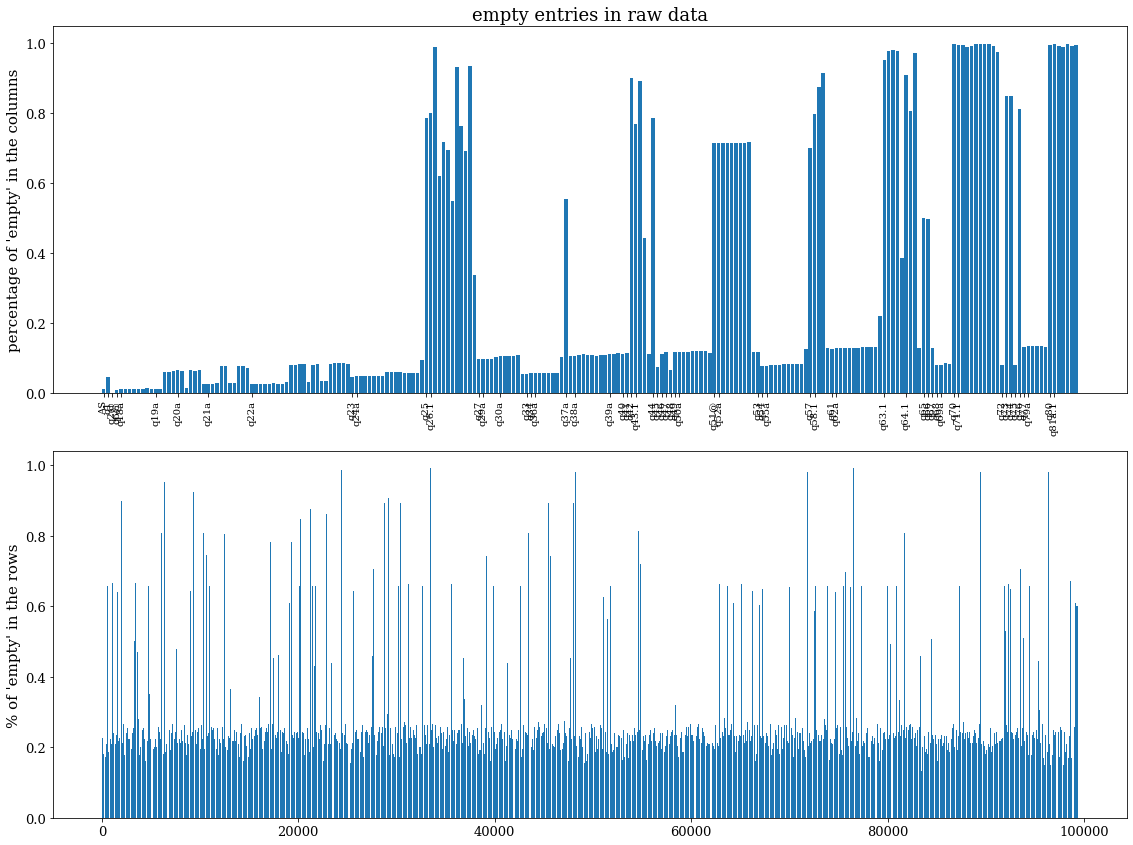

In [10]:
plt.figure(figsize=(16,12))
## print nas
naPercentage = emp
naPercentage = naPercentage[naPercentage > 0]
plt.subplot(2,1,1)
plt.plot(figsize=(15,4))
plt.bar(naPercentage.index, naPercentage.values)
plt.xticks(tick_ix, tick, rotation='vertical', size=10)
plt.ylabel("percentage of 'empty' in the columns")
plt.title("empty entries in raw data")

## percentage of NA in the rows
naPercentage2 = emp_row
naPercentage2 = naPercentage2[naPercentage2 > 0]
plt.subplot(2,1,2)
plt.plot(figsize=(15,4))
plt.bar(naPercentage2.index, naPercentage2.values)
plt.ylabel("% of 'empty' in the rows")

plt.tight_layout()
#savePNG("emptyEntries")

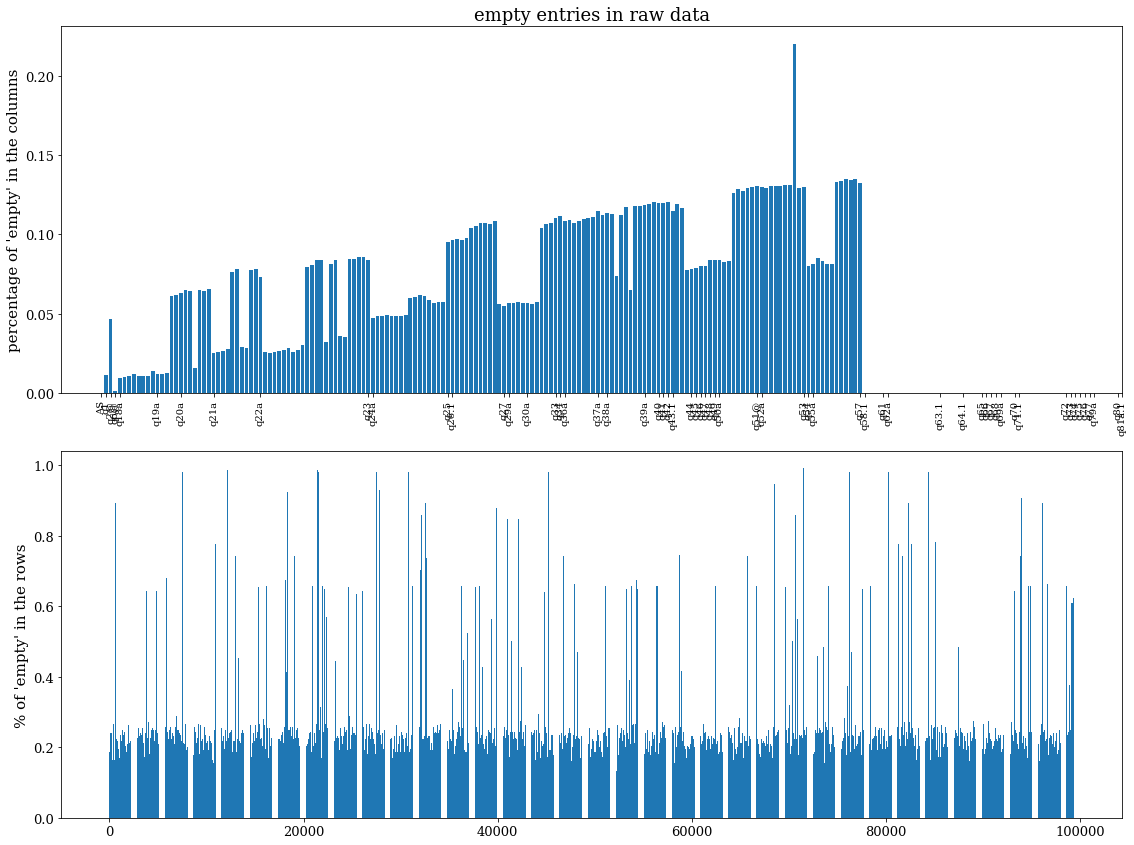

In [12]:
plt.figure(figsize=(16,12))
## print nas
naPercentage = emp
naPercentage = naPercentage[naPercentage < 0.3]
plt.subplot(2,1,1)
plt.plot(figsize=(15,4))
plt.bar(naPercentage.index, naPercentage.values)
plt.xticks(tick_ix, tick, rotation='vertical', size=10)
plt.ylabel("percentage of 'empty' in the columns")
plt.title("empty entries in raw data")

## percentage of NA in the rows
naPercentage2 = emp_row
naPercentage2 = naPercentage2[naPercentage2 > 0]
plt.subplot(2,1,2)
plt.plot(figsize=(15,4))
plt.bar(naPercentage2.index, naPercentage2.values)
plt.ylabel("% of 'empty' in the rows")

plt.tight_layout()
#savePNG("emptyEntries")

## Engineering & Technical Family only
By looking at the [questionaire](https://data.gov.au/data/dataset/cc6c9728-f872-4be0-ac96-ad85b842be9f/resource/851ab942-9158-404c-9640-87c370279a8e/download/2014-aps-employee-census-questionnaire.pdf) we can filter the individuals with Engineering in the APSC in **q16@**

In [184]:
from urllib.request import urlopen
import json

In [229]:
path

'../summer21/DANA4830/Proj'

In [232]:
try:
    df = pd.read_csv(os.path.join(path, "queried-2014.csv"))
except:
    url = "https://data.gov.au/data/api/3/action/datastore_search?resource_id=9b44e035-3bed-40dc-9687-34fc47b9f228&limit=99392"
    fileobj = urlopen(url)
    byt = fileobj.read()
    
    myData = json.loads(byt.decode())
    df = pd.json_normalize(myData["result"], record_path=["records"])

In [235]:
dat14 = df[df["q16"] == "Engineering and technical; Trades and Labour"]
dat14.shape

(1596, 238)

In [236]:
## compute empty cells cols
emp2_aux = [sum(dat14[kk] == " ")/dat14.shape[0] for kk in dat14.keys()]
emp2 = pd.Series(emp2_aux, index=dat14.keys())

## empty cells rows
emp2_aux_row = [sum(dat14.loc[ix] == " ")/dat14.shape[1] for ix in dat14.index]
emp2_row = pd.Series(emp2_aux_row)

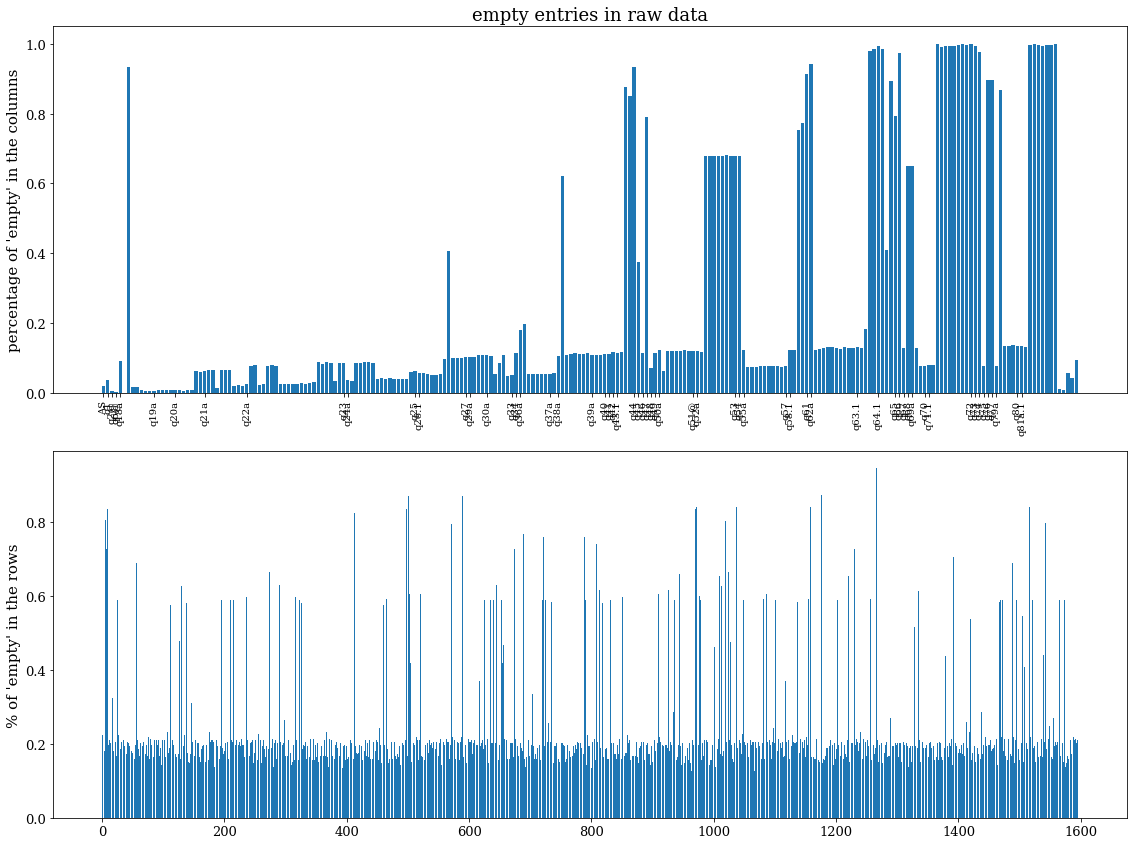

In [237]:
git@github.com:Igodlab/Australian-Public-Service-APS.gitplt.figure(figsize=(16,12))
## print nas
naPercentage = emp2
naPercentage = naPercentage[naPercentage > 0]
plt.subplot(2,1,1)
plt.plot(figsize=(15,4))
plt.bar(naPercentage.index, naPercentage.values)
plt.xticks(tick_ix, tick, rotation='vertical', size=10)
plt.ylabel("percentage of 'empty' in the columns")
plt.title("empty entries in raw data")

## percentage of NA in the rows
naPercentage2 = emp2_row
naPercentage2 = naPercentage2[naPercentage2 > 0]
plt.subplot(2,1,2)
plt.plot(figsize=(15,4))
plt.bar(naPercentage2.index, naPercentage2.values)
plt.ylabel("% of 'empty' in the rows")

plt.tight_layout()
#savePNG("emptyEntries")

In [242]:
## male female percentages
print("Male percentage: ", sum(dat14["q1"] == "Male")/dat14.shape[0])
print("Female percentage: ", sum(dat14["q1"] == "Female")/dat14.shape[0])

## 

Male percentage:  0.8308270676691729
Female percentage:  0.14974937343358397


# 2020 data

In [4]:
d20Cat = pd.read_csv(os.path.join("data","2020-aps-employee-census-dataset.csv"))
d20Cat.shape

(108085, 217)

In [5]:
## compute tick positions
tick = [d20Cat.keys()[0], d20Cat.keys()[1], d20Cat.keys()[2], d20Cat.keys()[3], d20Cat.keys()[4]]
tick_ix = [0, 1, 2, 3, 4]

for j in range(5, d20Cat.shape[1]-1):
    if d20Cat.keys()[j][:3] != d20Cat.keys()[j+1][:3]:
        tick.append(d20Cat.keys()[j+1])
        tick_ix.append(j+1)
'''        
## plot
plt.figure(figsize=(16,12))
## print nas
plt.subplot(2,1,1)
naPercentage = (d20Cat == " ").mean()
naPercentage = naPercentage[naPercentage > 0]
plt.bar(naPercentage.index, naPercentage.values)
plt.xticks(tick_ix, tick, rotation='vertical', size=10)
plt.ylabel("percentage of 'empty' in the columns")
plt.title("empty entries in raw data")

plt.subplot(2,1,2)
naPercentage2 = (d20Cat.T == " ").mean()
naPercentage2 = naPercentage2[naPercentage2 > 0]
plt.bar(naPercentage2.index, naPercentage2.values)
plt.ylabel("% of 'empty' in the rows")

plt.tight_layout()
#savePNG("NAperColumn")
'''

'        \n## plot\nplt.figure(figsize=(16,12))\n## print nas\nplt.subplot(2,1,1)\nnaPercentage = (d20Cat == " ").mean()\nnaPercentage = naPercentage[naPercentage > 0]\nplt.bar(naPercentage.index, naPercentage.values)\nplt.xticks(tick_ix, tick, rotation=\'vertical\', size=10)\nplt.ylabel("percentage of \'empty\' in the columns")\nplt.title("empty entries in raw data")\n\nplt.subplot(2,1,2)\nnaPercentage2 = (d20Cat.T == " ").mean()\nnaPercentage2 = naPercentage2[naPercentage2 > 0]\nplt.bar(naPercentage2.index, naPercentage2.values)\nplt.ylabel("% of \'empty\' in the rows")\n\nplt.tight_layout()\n#savePNG("NAperColumn")\n'

## 2020.1. Extract sections that are completely missing 

In [6]:
## boolean is True for all empty cells
d20Emp = d20Cat == " "
d20PerColumn = {}

## check if all sub-question columns are empty per question
for tix in range(1,len(tick_ix)):
    cc = [d20Cat.keys()[ii] for ii in range(tick_ix[tix-1], tick_ix[tix])]
    d20PerColumn[tick[tix-1]] = np.all(d20Emp[cc], axis=1).mean()
d20PerColumn[tick[-1]] = np.all(d20Emp[d20Emp.keys()[tick_ix[tix]:]], axis=1).mean()
d20PerColumn = pd.Series(d20PerColumn)

Text(0.5, 1.0, 'empty entries in raw data')

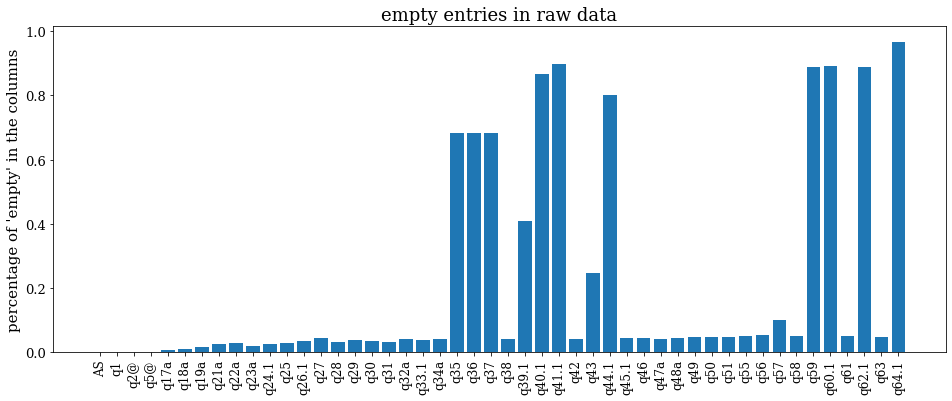

In [7]:
## plot all missing percentage per question (group all subquestions per question)
plt.figure(figsize=(16,6))
plt.bar(d20PerColumn.index, d20PerColumn.values)
plt.xticks(rotation='vertical', size=12)
plt.ylabel("percentage of 'empty' in the columns")
plt.title("empty entries in raw data")

In [8]:
## drop cols
drop_cols_init = ["q24.1", "q26.1", "q27", "q33.1", "q35", "q36", "q37", "q38", "q39.1", "q40.1", "q41.1", "q44.1",
             "q45.1", "q55", "q56", "q57", "q59", "q60.1", "q62.1", "q64.1"]

def remove_columns(x, drp):
    drop_cols = []
    ix = dict(zip(tick, tick_ix))
    for k in range(len(drp)-1):
        i0 = ix[drp[k]]
        i1 = tick_ix[tick_ix.index(i0)+1]
        drop_cols += list(x[list(x.keys()[i0:i1].values)].keys())
    drop_cols += ["q64."+str(i) for i in range(1,14)]
    return drop_cols

## 2020.2. convert categorical to values

In [9]:
def categorical_convert(x):
    X = x.copy()
    kk = list(x.keys())
    
    for j in kk:
        uni = x[j].unique()
        if ("Strongly agree" in uni):
            X[j][X[j] == "Strongly agree"]             = 1
            X[j][X[j] == "Agree"]                      = 2
            X[j][X[j] == "Neither agree nor disagree"] = 3
            X[j][X[j] == "Disagree"]                   = 4
            X[j][X[j] == "Strongly disagree"]          = 5
            X[j][X[j] == "Do not know"]                = 6
            X[j][X[j] == " "]                          = np.nan
            
        elif ("Tick" in uni) or ("Ticked" in uni):
            X[j][X[j] == "Tick"]   = 1
            X[j][X[j] == "Ticked"] = 1
            X[j][X[j] == " "]      = 0
            
            
        elif ("No" in uni):
            X[j][X[j] == "Yes"]                        = 1
            X[j][X[j] == "No"]                         = 2
            X[j][X[j] == "Not Sure"]                   = 3
            X[j][X[j] == "Not sure"]                   = 3
            X[j][X[j] == "Would prefer not to answer"] = 4
            X[j][X[j] == " "]                          = np.nan
            
        elif ("Impartial" in uni):
            X[j][X[j] == "Impartial"]            = 1
            X[j][X[j] == "Committed to service"] = 2
            X[j][X[j] == "Accountable"]          = 3
            X[j][X[j] == "Respectful"]           = 4
            X[j][X[j] == "Ethical"]              = 5
            X[j][X[j] == " "]                    = np.nan
            
        elif ("Positive change" in uni):
            X[j][X[j] == "Very positive change"] = 1
            X[j][X[j] == "Positive change"]      = 2
            X[j][X[j] == "No change"]            = 3
            X[j][X[j] == "Negative change"]      = 4
            X[j][X[j] == "Very negative change"] = 5
            X[j][X[j] == " "]                    = np.nan
            
        elif ("To a large extent" in uni):
            X[j][X[j] == "To a very large extent"] = 1
            X[j][X[j] == "To a large extent"]      = 2
            X[j][X[j] == "Somewhat"]               = 3
            X[j][X[j] == "To a small extent"]      = 4
            X[j][X[j] == "To a very small extent"] = 5
            X[j][X[j] == " "]                      = np.nan
            
        # q 28, q29
        elif ("2" in uni):
            X[j][X[j] == "Don't know"] = 0
            X[j][X[j] == '1']          = 1
            X[j][X[j] == '2']          = 2
            X[j][X[j] == '3']          = 4
            X[j][X[j] == '5']          = 5
            X[j][X[j] == '6']          = 6
            X[j][X[j] == '7']          = 7
            X[j][X[j] == '8']          = 8
            X[j][X[j] == '9']          = 9
            X[j][X[j] == '10']         = 10
            X[j][X[j] == " "]          = np.nan
            
        # AS question only
        elif ("Large (1,001 or more employees)" in uni):
            X[j][X[j] == "Large (1,001 or more employees)"] = 3
            X[j][X[j] == "Medium (251 to 1,000 employees)"] = 2
            X[j][X[j] == "Small (Less than 250 employees)"] = 1
            X[j][X[j] == " "]                               = np.nan
        
        # q1 only
        elif ("Male" in uni):
            X[j][X[j] == "Male"]                                   = 1
            X[j][X[j] == "Female"]                                 = 2
            X[j][X[j] == "X (Indeterminate/Intersex/Unspecified)"] = 3
            X[j][X[j] == "Prefer not to say"]                      = 4
            X[j][X[j] == " "]                                      = np.nan
        
        # q2@ only
        elif ("Under 40 years" in uni):
            X[j][X[j] == "Under 40 years"]    = 1
            X[j][X[j] == "40 to 54 years"]    = 2
            X[j][X[j] == "55 years or older"] = 3
            X[j][X[j] == " "]                 = np.nan
            
        # q5@ only
        elif ("SES" in uni):
            X[j][X[j] == "Trainee/Graduate/APS"] = 1
            X[j][X[j] == "EL"]                   = 2
            X[j][X[j] == "SES"]                  = 3
            X[j][X[j] == " "]                    = np.nan
            
            
        elif ("To a great extent" in uni):
            X[j][X[j] == "Not at all"]             = 1
            X[j][X[j] == "Very little"]            = 2
            X[j][X[j] == "Somewhat"]               = 3
            X[j][X[j] == "To a great extent"]      = 4
            X[j][X[j] == "To a very great extent"] = 5
            X[j][X[j] == " "]                      = np.nan
            
        elif ("Often" in uni):
            X[j][X[j] == "Always"]    = 1
            X[j][X[j] == "Often"]     = 2
            X[j][X[j] == "Sometimes"] = 3
            X[j][X[j] == "Rarely"]    = 4
            X[j][X[j] == "Never"]     = 5
            X[j][X[j] == " "]         = np.nan
            
        # q27 only
        elif ("Increased clarity around priorities" in uni):
            X[j][X[j] == "Increased clarity around my role and responsibilities"] = 1
            X[j][X[j] == "Increased clarity around priorities"]                   = 2
            X[j][X[j] == "Improved technology and a more digital environment"]    = 3
            X[j][X[j] == "Improved internal communication"]                       = 4
            X[j][X[j] == "Fewer layers of decision making"]                       = 5
            X[j][X[j] == "Increased experimentation with new ideas"]              = 6
            X[j][X[j] == "Increased mobility"]                                    = 7
            X[j][X[j] == "Increased flexibility in work practices"]               = 8
            X[j][X[j] == "Increased instances of working as one APS"]             = 9
            X[j][X[j] == "Other"]                                                 = 10
            X[j][X[j] == " "]                                                     = np.nan
            
        # q30 only
        elif ("Reduced" in uni):
            X[j][X[j] == "Significantly improved"] = 1
            X[j][X[j] == "Improved"]               = 2
            X[j][X[j] == "No change"]              = 3
            X[j][X[j] == "Reduced"]                = 4
            X[j][X[j] == "Significantly reduced"]  = 5
            X[j][X[j] == " "]                      = np.nan
            
        # q31 only
        elif ("Slightly above capacity – lots of work to do" in uni):
            X[j][X[j] == "Well above capacity – too much work"]                = 1
            X[j][X[j] == "Slightly above capacity – lots of work to do"]       = 2
            X[j][X[j] == "At capacity – about the right amount of work to do"] = 3
            X[j][X[j] == "Slightly below capacity – available for more work"]  = 4
            X[j][X[j] == "Below capacity – not enough work"]                   = 5
            X[j][X[j] == " "]                                                  = np.nan
            
    return X

In [10]:
d20 = categorical_convert(d20Cat)


drop_cols = remove_columns(d20, drop_cols_init)
d20Numerical = d20.drop(drop_cols, axis=1)
d20Nominal   = d20[drop_cols]



In [11]:
d20Numerical

,AS,q1,q2@,q5@,q17a,q17b,q17c,q17d,q17e,q17f,...,q48c,q48d,q48e,q48f,q49,q50,q51,q58,q61,q63
0,3,1,1,1,2,2,3,2,2,1,...,2,2,2,2,2,3,1,2,2,2
1,2,1,2,2,1,1,2,2,2,2,...,3,4,1,4,3,2,3,2,2,2
2,2,1,2,2,2,2,4,2,2,3,...,4,4,2,2,1,4,2,2,2,2
3,1,2,3,1,2,3,3,2,3,3,...,1,1,2,1,4,4,3,2,2,2
4,2,4,3,1,4,5,3,5,2,2,...,3,4,2,3,4,2,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108080,3,2,1,1,2,2,4,1,2,1,...,1,2,3,2,4,2,3,2,2,2
108081,3,1,3,1,3,3,3,3,3,4,...,3,3,3,3,4,2,2,2,3,2
108082,3,2,1,2,2,2,2,2,2,2,...,2,2,2,2,4,2,2,2,2,2
108083,3,1,1,2,1,2,2,2,1,1,...,3,3,2,3,4,3,2,2,2,2


In [12]:
d20Nominal

,q24.1,q24.2,q24.3,q24.4,q24.5,q24.6,q24.7,q24.8,q24.9,q24.10,...,q64.4,q64.5,q64.6,q64.7,q64.8,q64.9,q64.10,q64.11,q64.12,q64.13
0,1,1,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108080,1,1,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
108081,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
108082,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108083,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
saveCSV(d20Numerical, "d20Numerical")
saveCSV(d20Nominal, "d20Nominal")